In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df_Moufia = pd.read_csv("Moufia_2014_2015/moufia_2014_2015.csv")
df_Possession = pd.read_csv("Possession_2014_2015/possession_2014_2015.csv")
df_SaintAndre = pd.read_csv("SaintAndre_2014_205/saintandre_2014_2015.csv")
df_SaintLeu = pd.read_csv("SaintLeu_2014_2015/saintleu_2014_2015.csv")
df_SaintPierre = pd.read_csv("SaintPierre_2014_2015/saintpierre_2014_2015.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)

df_Moufia.head()
df_Possession.head()
df_SaintAndre.head()
df_SaintLeu.head()
df_SaintPierre.head()

Timestamp  FD_Avg  FG_Avg  Patm_Avg    RH_Avg  Text_Avg  \
0  2014-01-01 00:00:00   3.871   3.643    1002.8  73.16666      25.5   
1  2014-01-01 00:01:00   3.871   3.814    1002.8  73.11666      25.5   
2  2014-01-01 00:02:00   1.366   8.710    1002.8  72.83334      25.5   
3  2014-01-01 00:03:00   3.871   6.318    1002.8  72.43333      25.5   
4  2014-01-01 00:04:00   3.871   3.814    1002.8  72.33334      25.5   

   WD_MeanUnitVector   WS_Mean  
0           37.50000  1.983333  
1           29.49695  2.283333  
2           26.65659  2.783333  
3           24.82494  3.133333  
4           20.83340  3.316667

In [15]:
df_Moufia['Timestamp'] = pd.DatetimeIndex(df_Moufia['Timestamp']) 
df_Moufia.set_index('Timestamp',inplace = True)

In [16]:
df_Moufia = df_Moufia[['FD_Avg','FG_Avg','Text_Avg','WD_MeanUnitVector','WS_Mean']]
df_Moufia.head()

FD_Avg  FG_Avg  Text_Avg  WD_MeanUnitVector   WS_Mean
Timestamp                                                                 
2014-01-01 00:00:00   7.999   1.759  24.60000          100.99800  4.616667
2014-01-01 00:01:00   1.361   4.084  24.58333           94.43468  3.750000
2014-01-01 00:02:00   3.574   6.297  24.51666           97.81310  5.583333
2014-01-01 00:03:00   5.673   2.212  24.50000           92.55701  5.300000
2014-01-01 00:04:00   1.588   6.524  24.50000           98.83556  4.650000

In [18]:
from sklearn.preprocessing import StandardScaler
data = df_Moufia
scaler = StandardScaler()
scaler.fit(data)
normalized = scaler.transform(data)
normalized
df_Moufia[['FD_Avg','FG_Avg','Text_Avg','WD_MeanUnitVector','WS_Mean']] = normalized
df_Moufia.head()

FD_Avg    FG_Avg  Text_Avg  WD_MeanUnitVector   WS_Mean
Timestamp                                                                     
2014-01-01 00:00:00 -0.511143 -0.611588  0.825685          -0.622357  0.751749
2014-01-01 00:01:00 -0.546750 -0.605513  0.818832          -0.703318  0.320463
2014-01-01 00:02:00 -0.534879 -0.599730  0.791425          -0.661644  1.232798
2014-01-01 00:03:00 -0.523620 -0.610404  0.784576          -0.726480  1.091801
2014-01-01 00:04:00 -0.545533 -0.599137  0.784576          -0.649032  0.768336

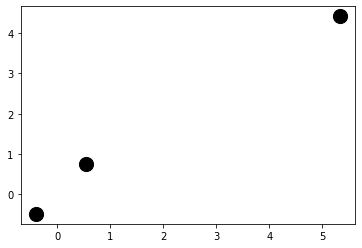

In [19]:
from sklearn.cluster import KMeans
import numpy as np
X = df_Moufia
nb_cluster = 3
kmeans = KMeans(n_clusters=nb_cluster, random_state=42).fit(X)
labels = kmeans.labels_

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=1);

In [20]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_Moufia.index.values
cluster_map['cluster'] = labels
cluster_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023581 entries, 0 to 1023580
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   data_index  1023581 non-null  datetime64[ns]
 1   cluster     1023581 non-null  int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 11.7 MB


In [21]:
df_Moufia['cluster'] = cluster_map['cluster'].values
df_Moufia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1023581 entries, 2014-01-01 00:00:00 to 2015-12-31 00:00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   FD_Avg             1023581 non-null  float64
 1   FG_Avg             1023581 non-null  float64
 2   Text_Avg           1023581 non-null  float64
 3   WD_MeanUnitVector  1023581 non-null  float64
 4   WS_Mean            1023581 non-null  float64
 5   cluster            1023581 non-null  int32  
dtypes: float64(5), int32(1)
memory usage: 50.8 MB


In [22]:
for i in range(nb_cluster):
    print(cluster_map[cluster_map.cluster == i].shape)
    #Compter le nombdre de points par cluster

(332228, 2)
(673378, 2)
(17975, 2)


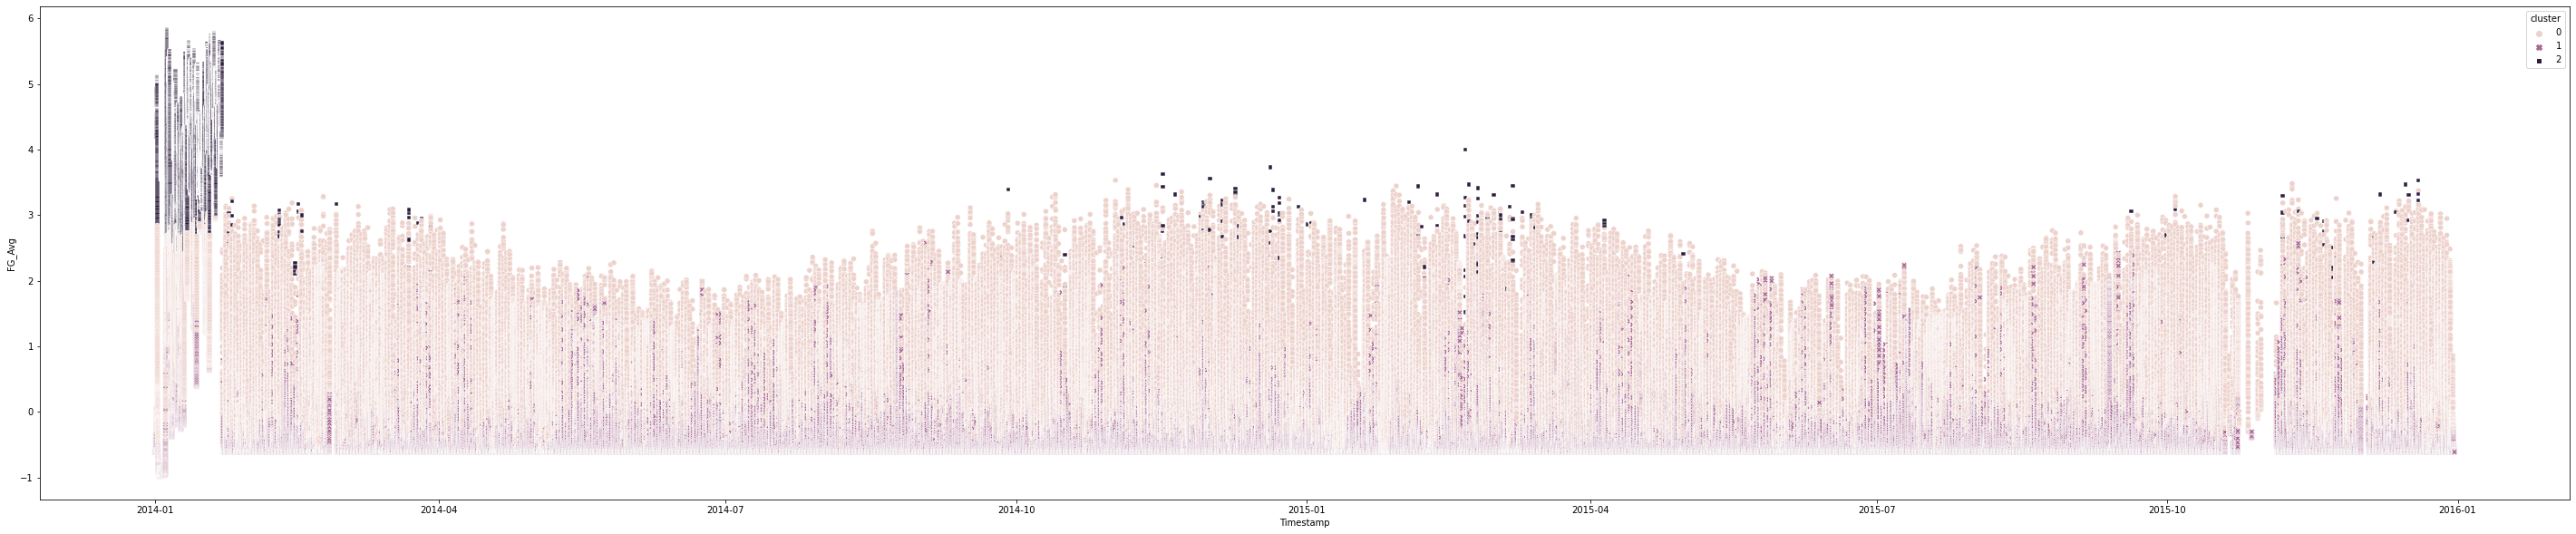

In [23]:
fig_dims = (50, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax, x=df_Moufia.index, y='FG_Avg', hue='cluster', data=df_Moufia,style= 'cluster')
fig.savefig("clusters_alldata.png")

Draw the 0 graph.
Draw the 1 graph.
Draw the 2 graph.


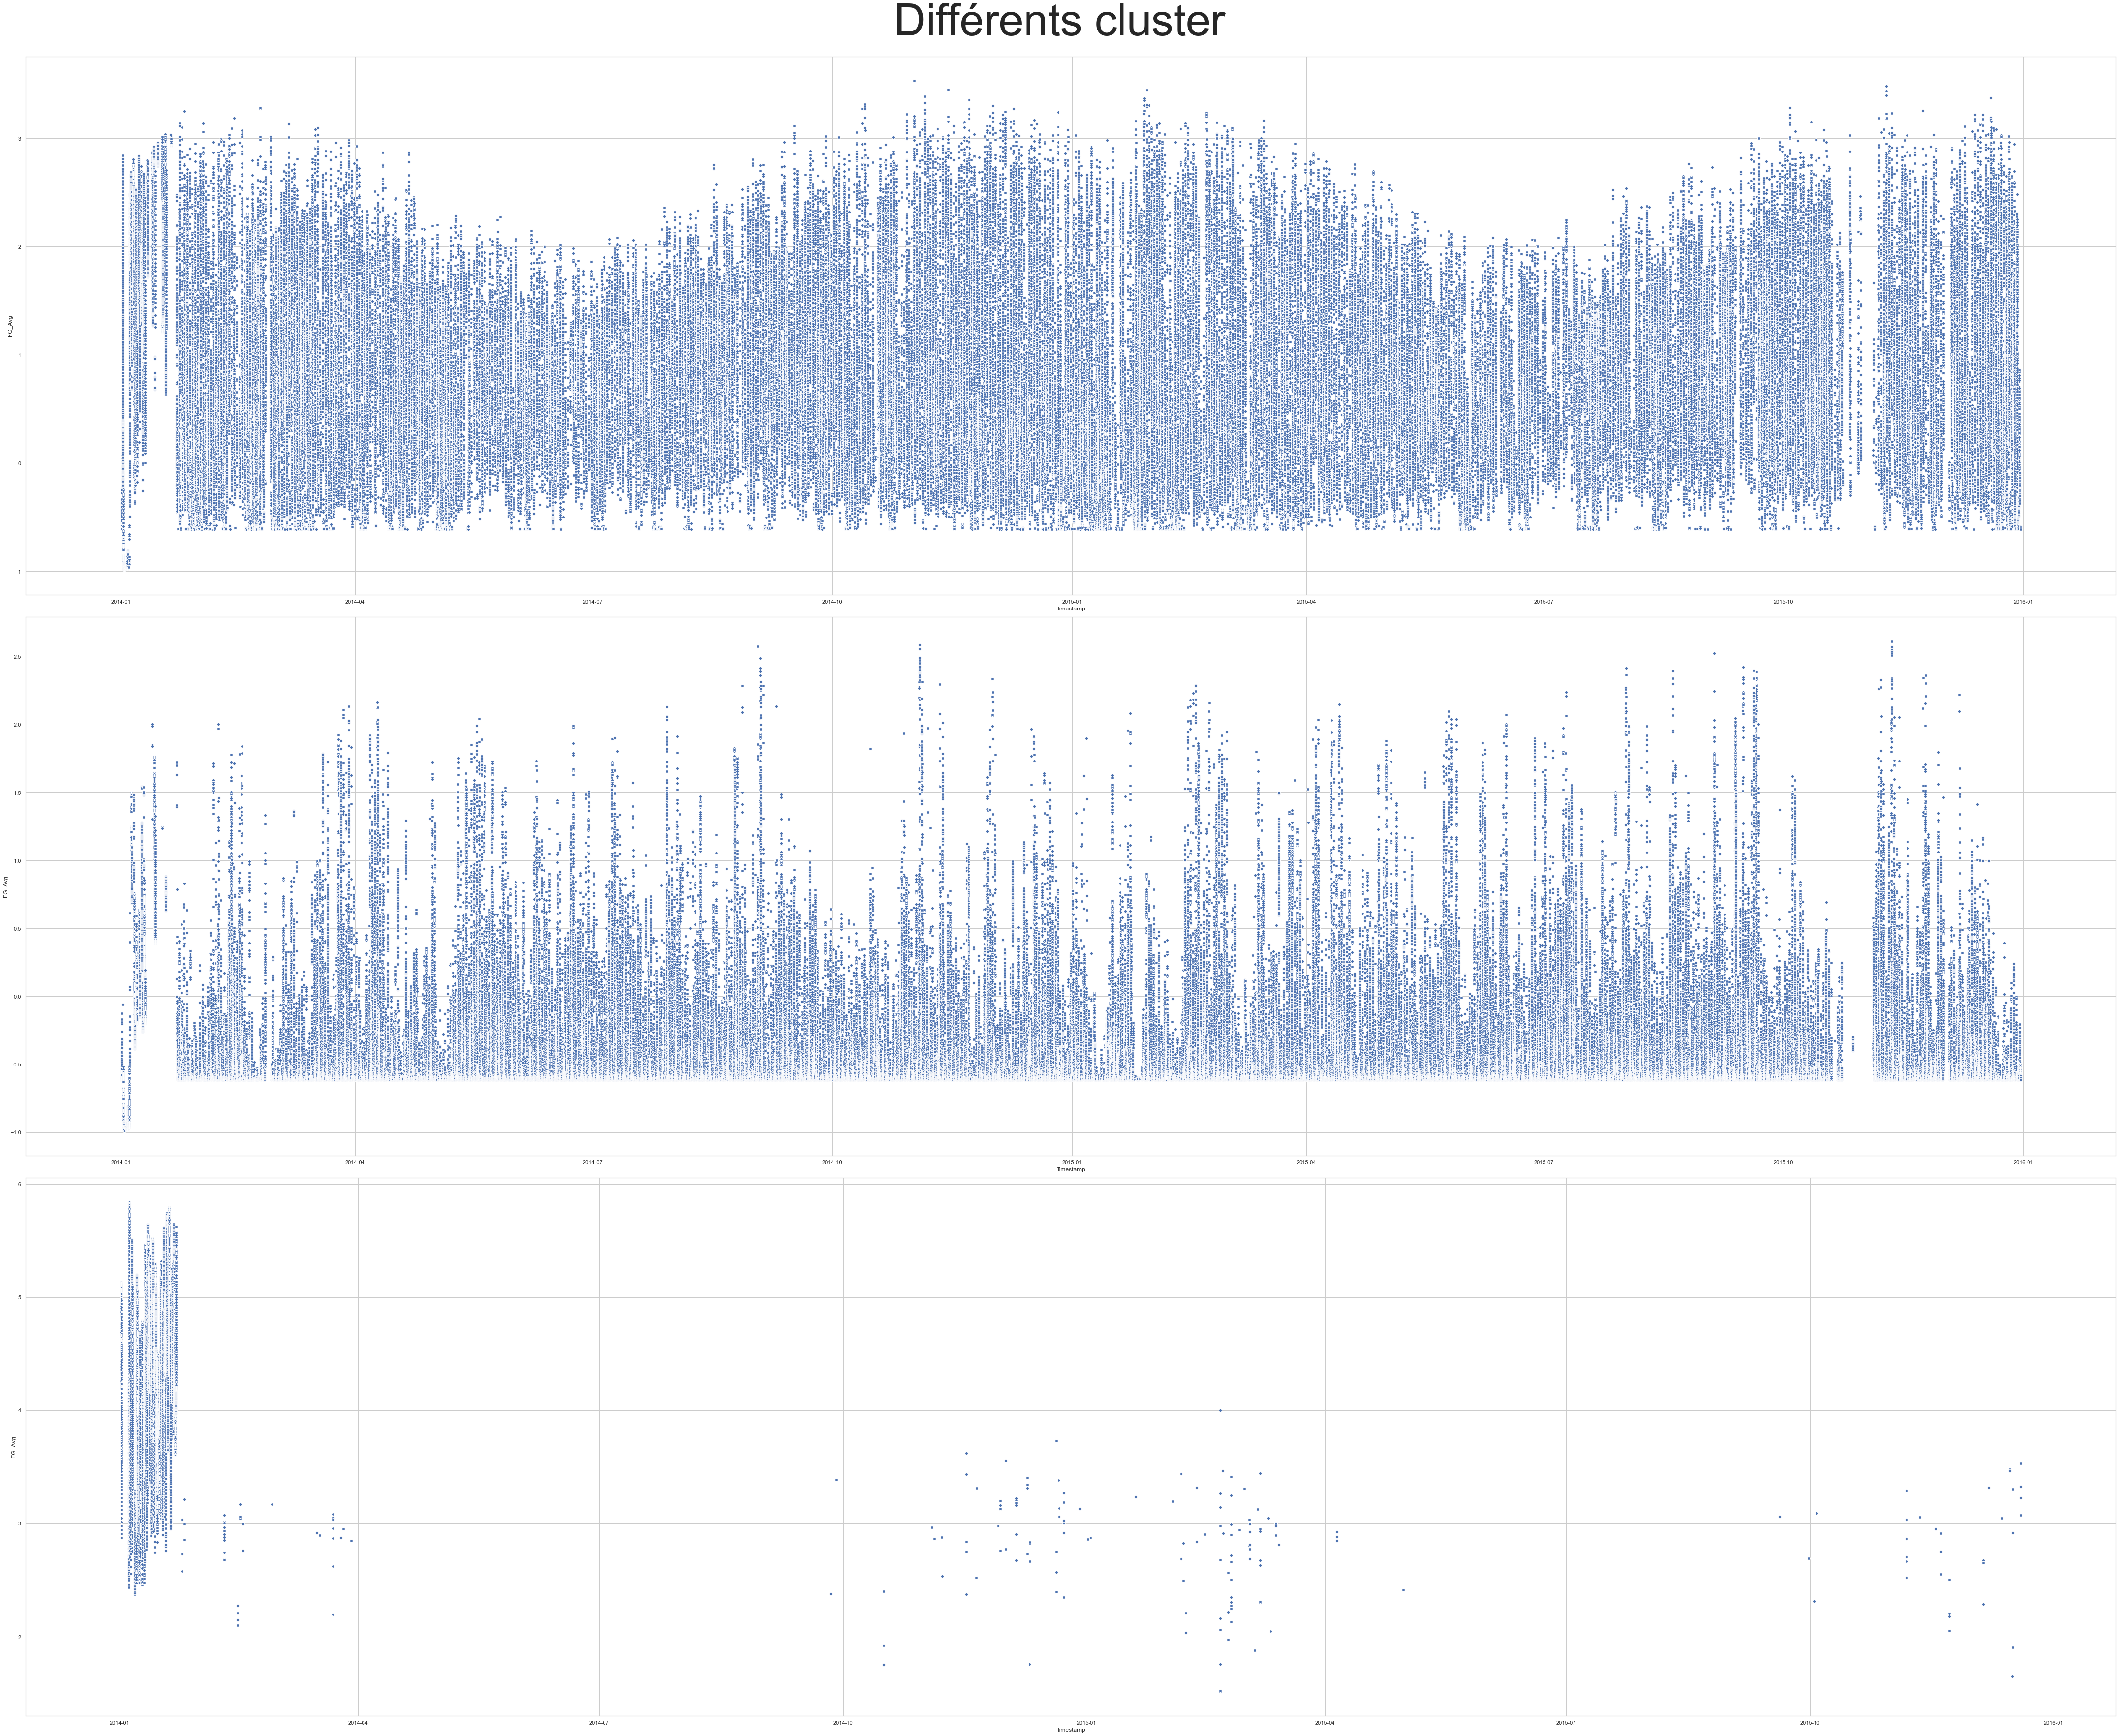

In [25]:
#Visualiser  tous les clusters
fig , axes = plt.subplots(3,1,figsize = (60,50))
sns.set_theme(style="whitegrid")
plt.suptitle('Différents cluster', size = 90)

    
for i in range(nb_cluster): 
    df_cluster5 = df_Moufia[df_Moufia.cluster == i]
    sns.scatterplot(ax = axes[i], x = df_cluster5.index, y= "FG_Avg", data=df_cluster5, palette="tab10", linewidth=1)
    print(f'Draw the {i} graph.')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.savefig("Moufia_clusters")
#Le cluster 1 est donc le "coupable" pour les données de Moufia

<ipython-input-33-edf9f4ba9096>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  no_weird_cluster_plot.set_xticklabels(labels = df_nocluster.index, rotation=30)


[Text(16071.0, 0, '2014-01-01 00:00:00'),
 Text(16161.0, 0, '2014-01-01 00:01:00'),
 Text(16252.0, 0, '2014-01-01 00:02:00'),
 Text(16344.0, 0, '2014-01-01 00:03:00'),
 Text(16436.0, 0, '2014-01-01 00:04:00'),
 Text(16526.0, 0, '2014-01-01 00:05:00'),
 Text(16617.0, 0, '2014-01-01 00:06:00'),
 Text(16709.0, 0, '2014-01-01 00:07:00'),
 Text(16801.0, 0, '2014-01-01 00:08:00')]

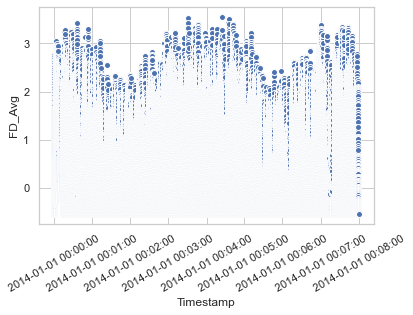

In [33]:
#Without cluster 1
df_nocluster = df_Moufia[df_Moufia.cluster != 2]
no_weird_cluster_plot =sns.scatterplot(x="Timestamp",y= "FD_Avg", data=df_nocluster, palette="tab10", linewidth=1)
no_weird_cluster_plot.set_xticklabels(labels = df_nocluster.index, rotation=30)

<AxesSubplot:xlabel='Timestamp', ylabel='FG_Avg'>

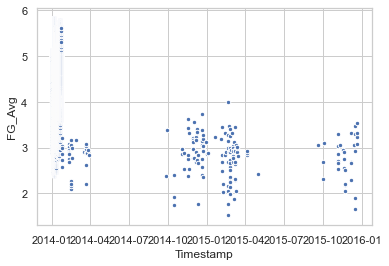

In [34]:
df_cluster5 = df_Moufia[df_Moufia.cluster == 2]
sns.scatterplot(x = df_cluster5.index, y= "FG_Avg", data=df_cluster5[["FG_Avg"]], palette="tab10", linewidth=1, s = 20)

1    984
0    396
Name: cluster, dtype: int64


<ipython-input-43-c94d063efc67>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  daily_plot.set_xticklabels(x_legend, rotation=45)


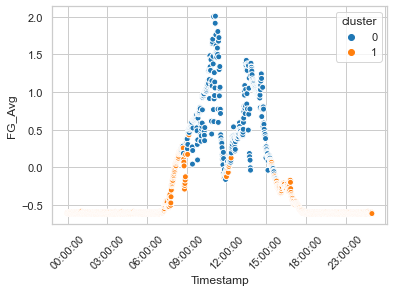

In [43]:
daily_data_winter =  df_Moufia[(df_Moufia.index >="2015-06-10 00:00:00") &  (df_Moufia.index < "2015-06-10 23:00:00")]
#2014-01-04 00:00:00 
# L’année se divise en deux grandes périodes : la saison chaude et humide, 
#de novembre à avril : c’est l’été austral et la saison plus sèche et plus fraîche, 
#de mai à octobre : c’est l’hiver austral.
print(daily_data_winter['cluster'].value_counts())
fig, ax = plt.subplots()
daily_plot = sns.scatterplot(ax = ax, x="Timestamp",y= "FG_Avg", data=daily_data_winter, hue ="cluster", palette="tab10", linewidth=1)
x_legend = ["00:00:00","03:00:00","06:00:00","09:00:00","12:00:00","15:00:00","18:00:00","23:00:00"]
daily_plot.set_xticklabels(x_legend, rotation=45)
fig.savefig("Moufia_scatterplot_winterDay")

1    810
0    570
Name: cluster, dtype: int64


<ipython-input-39-40fea07faee2>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  daily_plot.set_xticklabels(x_legend, rotation=45)


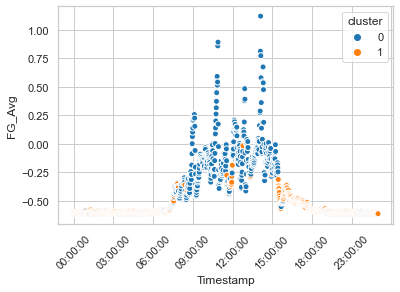

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
daily_data_summer =  df_Moufia[(df_Moufia.index >="2015-02-08 00:00:00") &  (df_Moufia.index < "2015-02-08 23:00:00")]
#2014-01-04 00:00:00 
# L’année se divise en deux grandes périodes : la saison chaude et humide, 
#de novembre à avril : c’est l’été austral et la saison plus sèche et plus fraîche, 
#de mai à octobre : c’est l’hiver austral.
print(daily_data_summer['cluster'].value_counts())
fig, ax = plt.subplots()
daily_plot = sns.scatterplot(ax = ax, x="Timestamp",y= "FG_Avg", data=daily_data_summer, hue ="cluster", palette="tab10", linewidth=1)
x_legend = ["00:00:00","03:00:00","06:00:00","09:00:00","12:00:00","15:00:00","18:00:00","23:00:00"]
daily_plot.set_xticklabels(x_legend, rotation=45)
fig.savefig("Moufia_scatterplot_summerDay")